## Vectorization

is shortly speaking getting rid of explicit _for_ loop in the code. In the calculations, where we have a lot of data, it can be  extremely important to have the code running faster just by doing vectorization.

Below some benchmark is performed:

1. Dot product implemented in numpy
2. Traditional loop multiplication

In [19]:
# example for one run - numpy

import time
a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print(c)
print("Vectorized version:" + str(1000*(toc-tic)) + " ms")

249753.70456274113
Vectorized version:0.965118408203125 ms


In [20]:
# example of one run - loop
c = 0
tic = time.time()
for i in range(1000000):
    c+=a[i]*b[i]
toc = time.time()

print(c)
print("Loop version:" + str(1000*(toc-tic)) + " ms")

249753.70456274686
Loop version:479.0365695953369 ms


In [31]:
# functions to perform a simulation because the timing can vary and we want to compare the distribution of a time

def numpy_dot_product(sim_number):
    results_list = []
    
    for i in range(sim_number):
        np.random.seed(i)
        a = np.random.rand(1000000)
        b = np.random.rand(1000000)
        c = 0

        tic = time.time()
        c = np.dot(a,b)
        toc = time.time()
        
        results_list.append(1000*(toc-tic))
    
    return results_list

In [ ]:
def loop_product(sim_number):
    results_list = []
    
    for i in range(sim_number):
        np.random.seed(i)
        a = np.random.rand(1000000)
        b = np.random.rand(1000000)
        c = 0

        tic = time.time()
        for j in range(1000000):
            c+=a[j]*b[j]
        toc = time.time()
        
        results_list.append(1000*(toc-tic))
    
    return results_list

In [32]:
numpy_list = numpy_dot_product(1000)

In [36]:
loop_list = loop_product(1000)

In [40]:
import pandas as pd
results = pd.DataFrame({'numpy_dot': numpy_list
                        ,'loop': loop_list})

What can be seen is that after running 1000 simulations, the average time of numpy arrays mutliplication using _dot_ function is much smaller than using traditional loop element by element multiplication. We see that average time for loop approach is more than 400 times slower.

Text(0.5, 0, 'Time of vectors multiplication in ms')

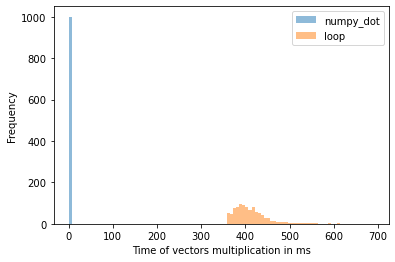

In [45]:
results.plot.hist(bins=100, alpha=0.5).set_xlabel("Time of vectors multiplication in ms")

In [49]:
print("Numpy avg time:" + str(np.average(numpy_list)))
print("Loop avg time:" + str(np.average(loop_list)))

Numpy avg time:1.1552417278289795
Loop avg time:414.22988176345825
